In [1]:
## . . Typical Functions
import matplotlib.pyplot as plt
import numpy as np

## . . image toolbox
import matplotlib.image as mpimg

# LAB 4 - 1D/2D Fourier Transforms

## DUE: 9 February 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to give you additional practice with 1D and 2D Fourier Transforms and manipulation of their spectra and phase.  

Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help the TA with the grading process.**

# Part 1 - 2D Fourier Transforms

## Q1: The Importance of Phase

So far in this course we have largely focused on the Fourier power spectra and have not discussed phase that much.  However, this is not to say that phase isn't important! This question examines the importance of phase by switching the 2D phase of two images.

Let's take a few photographs that you may recognize from the news in 2020 ...

TRUMP IMAGE dims:  300 300
BIDEN IMAGE dims:  300 300


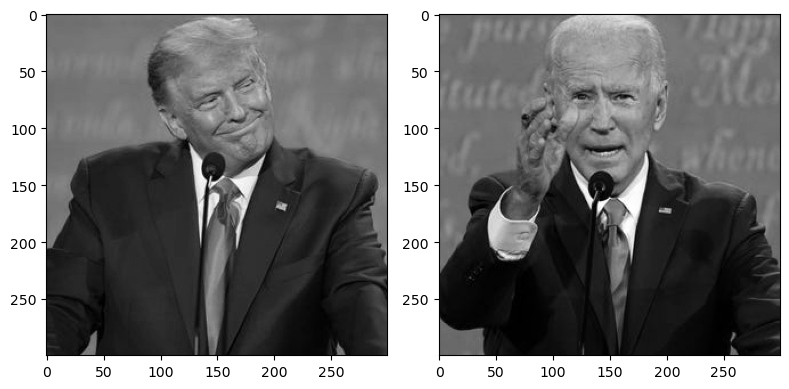

In [2]:
# . . Read in image and average over the three R-G-B channels
# . . to form a black and white image
img1 = mpimg.imread('data/trump-biden-split.jpg')
DJT = np.sum(img1[10:310,:300,:],axis=2)/3. 
JRB = np.sum(img1[:300,360:,:],axis=2)/3.

# . . Check image sizes
print("TRUMP IMAGE dims: ",str(np.size(DJT,0)),str(np.size(DJT,1)))
print("BIDEN IMAGE dims: ",str(np.size(JRB,0)),str(np.size(JRB,1)))

# . . Images sizes in X and Y directions
nx = np.size(JRB,1)
ny = np.size(JRB,0)

# . . Plot the contestants
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(DJT,aspect='auto',cmap='gray')
plt.subplot(1,2,2)
plt.imshow(JRB,aspect='auto',cmap='gray')
plt.tight_layout()
plt.show()

**Your Assignment:**
    
(a) Take the 2D Fourier Transform of each image (*np.fft.fft2*) and then calculate the magnitude spectrum using the *np.abs()* command and phase using the *np.angle()* command. Make sure that you use the *np.fft.fftshift* command to transform the Fourier domain $[k_x,k_y]$ in the correct quadrants.  Plot (1) the power spectrum and (2) the phase of each candidate in a 2x2 grid using the *plt.imshow* command.

Text(0.5, 1.0, 'Phase Trump')

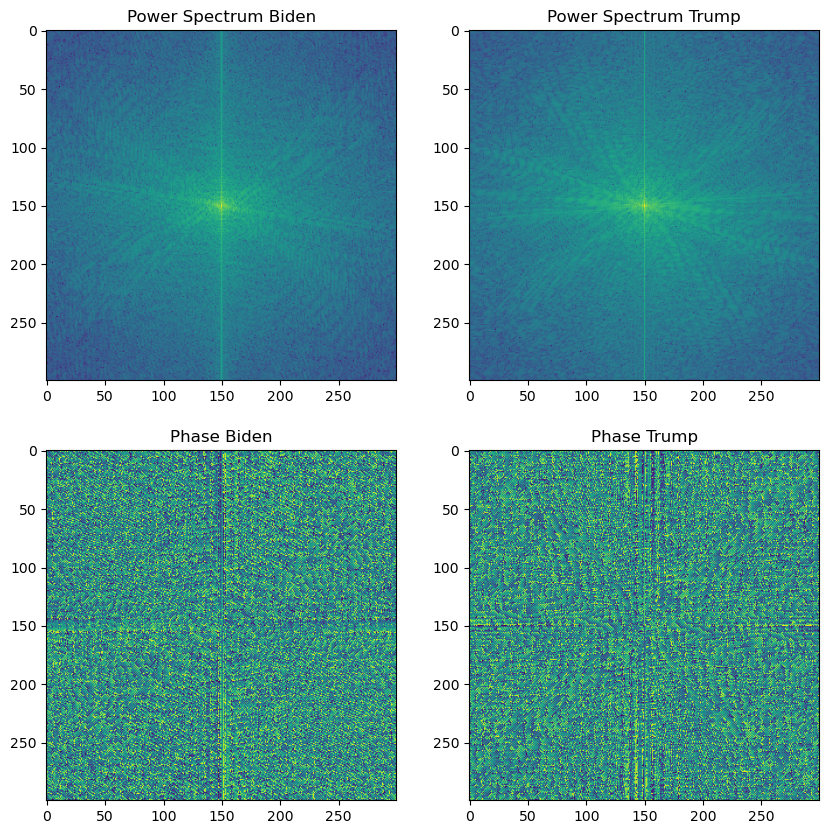

In [3]:
# .. Your Answer to Q2a here
#Fourier transform of images
fft_JRB=np.fft.fft2(JRB)/(nx*ny)
fft_DJT=np.fft.fft2(DJT)/(nx*ny)

#magnitude spectrum
mag_JRB= np.abs(np.fft.fftshift(fft_JRB))
mag_DJT= np.abs(np.fft.fftshift(fft_DJT))

#phase
p_JRB= np.angle(np.fft.fftshift(fft_JRB))
p_DJT= np.angle(np.fft.fftshift(fft_DJT))

#plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(20*np.log(mag_JRB))
axs[0,0].set_title('Power Spectrum Biden')
axs[1,0].imshow(p_JRB)
axs[1,0].set_title('Phase Biden')

axs[0,1].imshow(20*np.log(mag_DJT))
axs[0,1].set_title('Power Spectrum Trump')
axs[1,1].imshow(p_DJT)
axs[1,1].set_title('Phase Trump')


(b) Create two new objects in the Fourier domain where the candidates keep their own magnitude spectra, but "borrow" each other's phase information.

In [4]:
# .. Your Answer to Q2b here
bor_JRB= mag_JRB *np.exp(1j*p_DJT)
bor_DJT= mag_DJT *np.exp(1j*p_JRB) 


(c) Take the inverse 2D Fourier Transform (*np.fft.ifft2*) of the two new images you created in (b) and replot the images using the *plt.imshow* command.  You may have to rescale the image values to be between 0 and 1.  Comment on what you see!

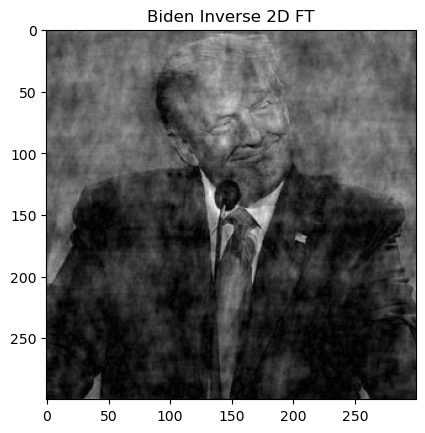

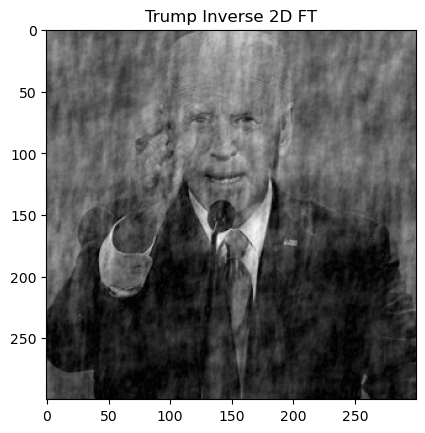

In [5]:
# .. Your Answer to Q2c here
inv_JRB=abs(np.fft.ifft2(bor_JRB))
inv_DJT=abs(np.fft.ifft2(bor_DJT))

plt.imshow(inv_JRB,cmap='gray')
plt.title("Biden Inverse 2D FT")
plt.show()

plt.imshow(inv_DJT,cmap='gray')
plt.title("Trump Inverse 2D FT")
plt.show()

In the image where I plotted the inverse 2D fourier transform of Biden (Biden Magnitude Spectrum, with Trump phase), I get an image of Trump. The same thing happens when I plot the inverse transform of Trump, I get an image of Biden.  